In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('salary_data_cleaned.csv')

In [30]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$100K - $130K (Employer est.),"At Fulcrum, we provide cutting-edge data scien...",-1,Fulcrum Analytics,Remote,-1,-1,-1,-1,...,130.0,115.000,Fulcrum Analytics,NaN,-1,0,0,0,0,0
1,Artificial Intelligence Engineer,$105.00 Per Hour (Employer est.),Job Role:- OCTO-Artificial Intelligence Engine...,-1,"Changing Technologies, Inc.","Washington, DC",Unknown,-1,Company - Public,-1,...,105.0,105.000,"Changing Technologies, Inc.",DC,-1,0,0,0,0,0
2,Artificial Intelligence Engineer,$85K - $122K (Glassdoor est.),NLT is seeking a candidate who's aligned with ...,4.9 ★,"New Light Technologies, Inc.4.9 ★","Washington, DC",1 to 50 Employees,-1,Company - Private,Accounting & Tax,...,122.0,103.500,"New Light Technologies, Inc.",DC,-1,0,0,0,0,1
3,Sr. Data Analyst,$52.73 - $90.50 Per Hour (Employer est.),Minimum 9 years of experience in global organi...,3.9 ★,Zen & Art3.9 ★,"New York, NY",501 to 1000 Employees,2001,Company - Private,Information Technology Support Services,...,90.5,71.615,Zen & Art,NY,19,0,0,0,0,0
4,Data Scientist,$79K - $117K (Employer est.),No Relocation Assistance Offered\r\n# 154742 -...,4.2 ★,Colgate-Palmolive4.2 ★,"Piscataway, NJ",10000+ Employees,1806,Company - Public,Consumer Product Manufacturing,...,117.0,98.000,Colgate-Palmolive,NJ,214,0,0,0,0,0


In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [32]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [33]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)


In [34]:
df.job_simp.value_counts()


data scientist    64
na                 6
analyst            3
director           2
data engineer      1
Name: job_simp, dtype: int64

In [35]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        48
senior    25
jr         3
Name: seniority, dtype: int64

In [36]:
# Fix state Los Angeles 
df['job_state'] = df['job_state'].apply(lambda x: 'CA' if isinstance(x, str) and x.strip().lower() == 'los angeles' else x)
df.job_state.value_counts()
#df.drop('job_state',inplace=True,axis=1)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [37]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      783
1      573
2      720
3      505
4      612
      ... 
71     653
72    1248
73     542
74     995
75     900
Name: desc_len, Length: 76, dtype: int64

In [38]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
1,1,210.00,210.00
3,1,105.46,181.00
5,1,130.00,140.00
9,1,140.00,170.00
29,1,130.00,150.00
33,1,151.26,151.26
34,1,52.40,102.78
38,1,62.00,74.00
55,1,140.00,150.00
58,1,130.00,150.00


In [39]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                Fulcrum Analytics
1      Changing Technologies, Inc.
2     New Light Technologies, Inc.
3                        Zen & Art
4                Colgate-Palmolive
                  ...             
71                    John Hancock
72                    IVID TEK INC
73                      Slesha inc
74      Advan Research Corporation
75                       Pinterest
Name: company_txt, Length: 76, dtype: object

In [40]:
df.describe()

,Founded,hourly,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,1371.105263,0.184211,108.975263,148.724211,116.559737,36.973684,0.118421,0.0,0.026316,0.052632,0.131579,1154.315789
std,911.193907,0.390232,30.461331,36.891664,36.708095,54.827237,0.325253,0.0,0.161136,0.224781,0.340279,1230.587223
min,-1.000000,0.000000,47.000000,74.000000,34.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,254.000000
25%,-1.000000,0.000000,85.750000,128.250000,91.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,611.500000
50%,1919.000000,0.000000,104.000000,149.000000,115.500000,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,782.500000
75%,2003.000000,0.000000,130.500000,171.250000,139.625000,42.500000,0.000000,0.0,0.000000,0.000000,0.000000,1086.750000
max,2020.000000,1.000000,210.000000,234.000000,205.000000,214.000000,1.000000,0.0,1.000000,1.000000,1.000000,7638.000000


In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

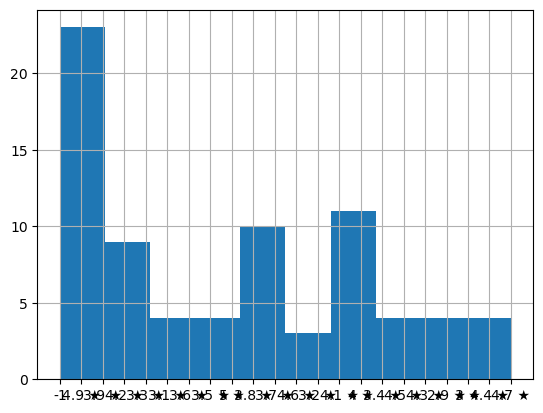

In [42]:
df.Rating.hist()

<AxesSubplot:>

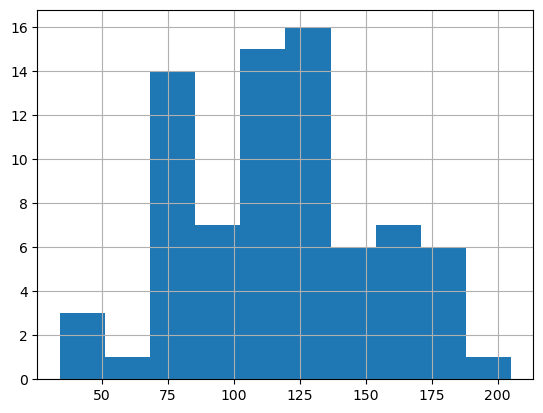

In [43]:
df.avg_salary.hist()

<AxesSubplot:>

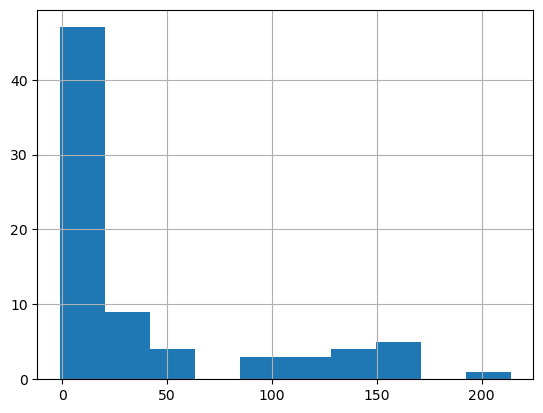

In [44]:
df.age.hist()

<AxesSubplot:>

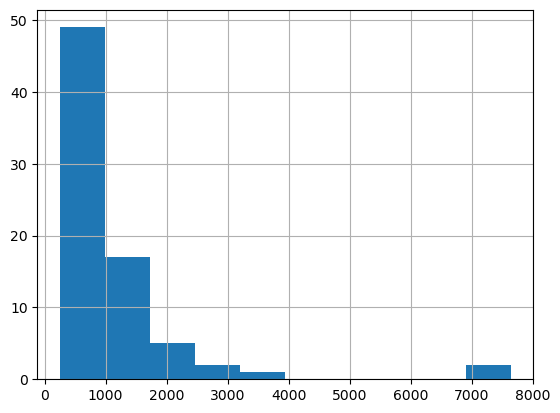

In [45]:
df.desc_len.hist()


<AxesSubplot:>

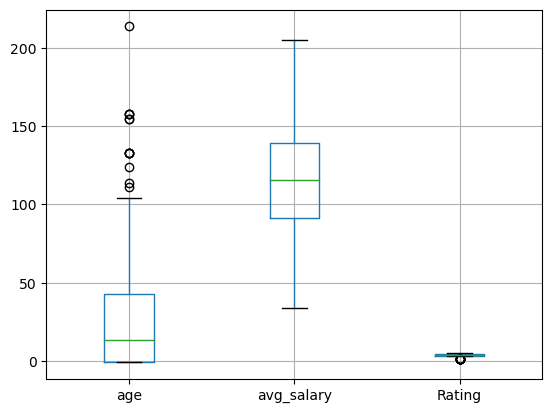

In [46]:
# df.columns
# Remove non-numeric characters and convert to numeric
df['Rating'] = df['Rating'].replace('[^0-9.]', '', regex=True).astype(float)
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

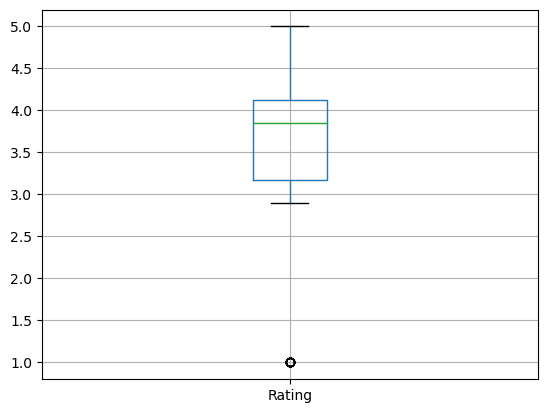

In [47]:
df.boxplot(column ='Rating')

In [48]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.144264,0.317889,0.039624
avg_salary,0.144264,1.000000,0.263163,0.078749
Rating,0.317889,0.263163,1.000000,0.174599
desc_len,0.039624,0.078749,0.174599,1.000000


<AxesSubplot:>

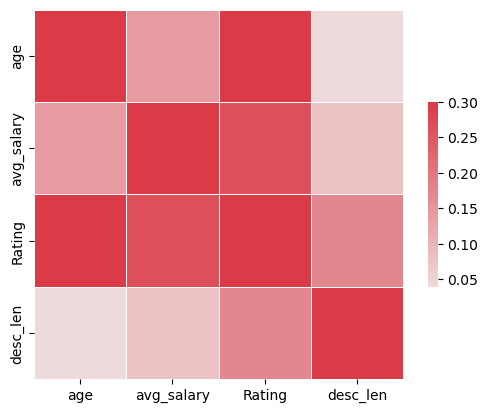

In [49]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [52]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt','job_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 32


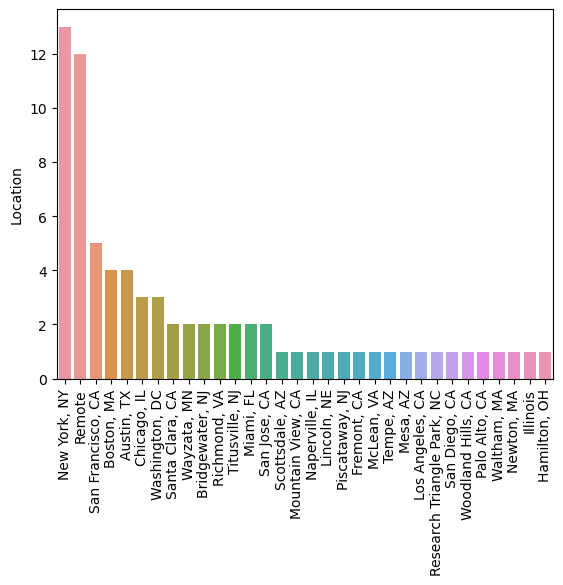

graph for Size: total = 9


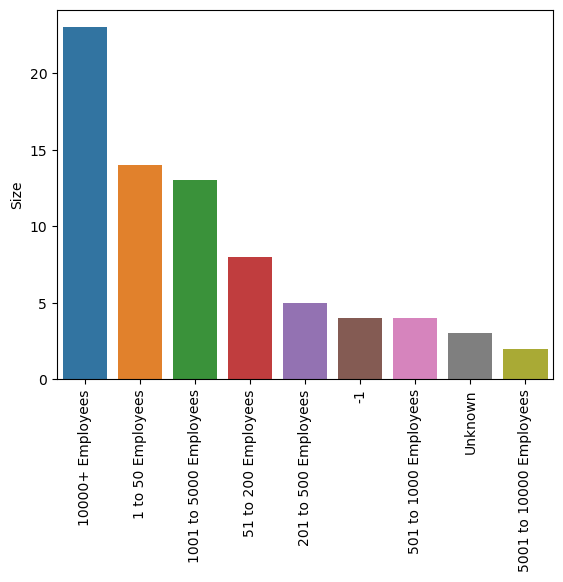

graph for Type of ownership: total = 6


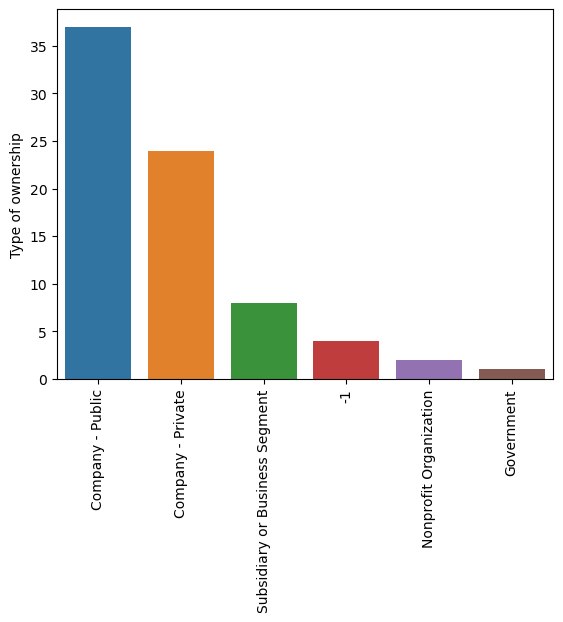

graph for Industry: total = 24


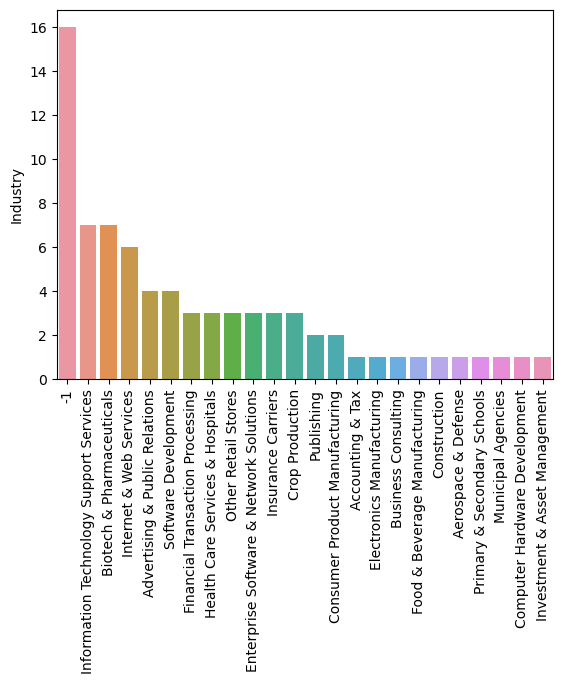

graph for Sector: total = 15


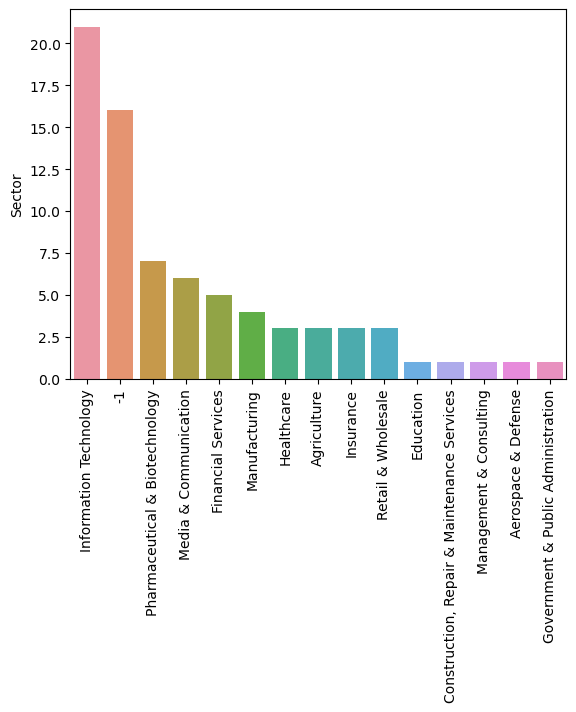

graph for Revenue: total = 10


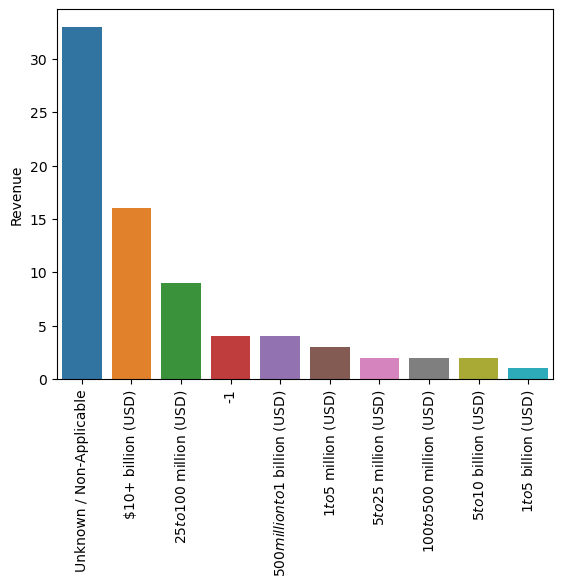

graph for company_txt: total = 56


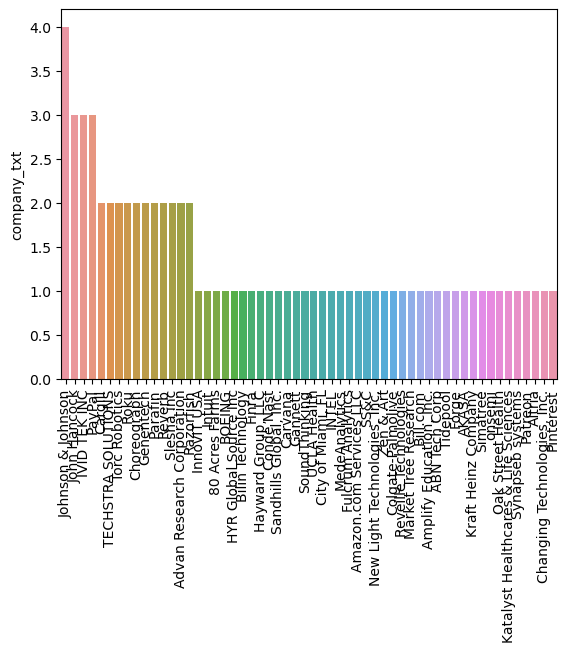

graph for job_state: total = 14


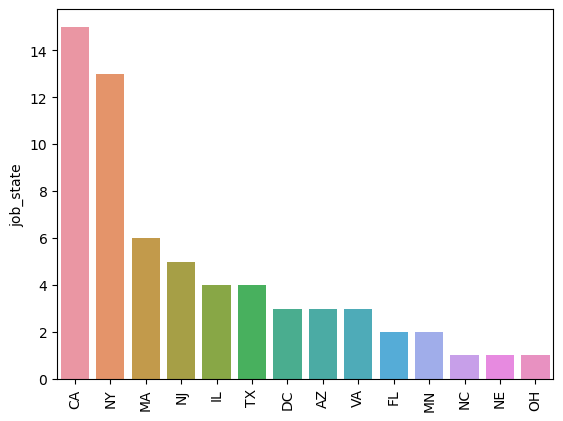

graph for python_yn: total = 2


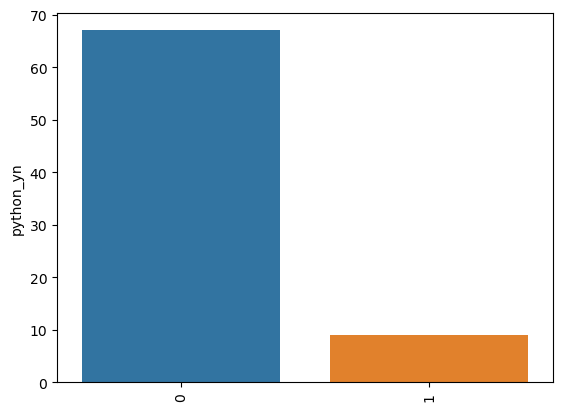

graph for R_yn: total = 1


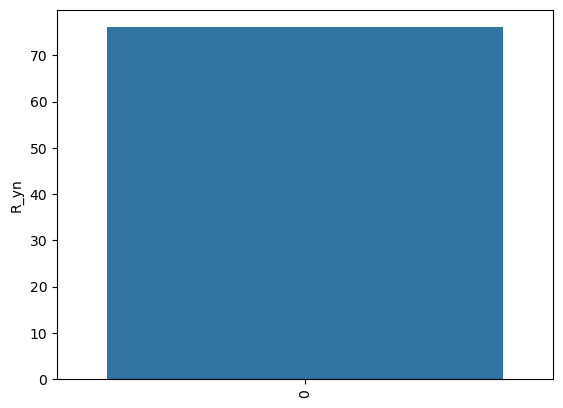

graph for spark: total = 2


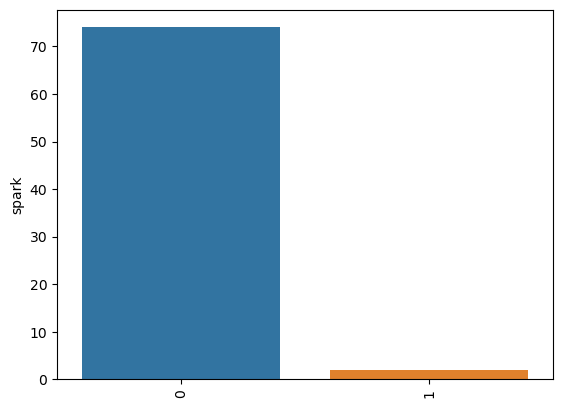

graph for aws: total = 2


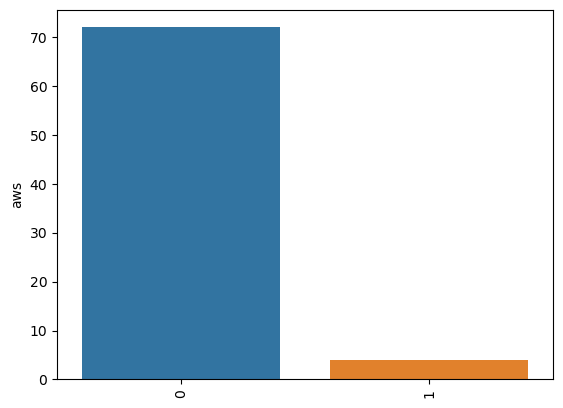

graph for excel: total = 2


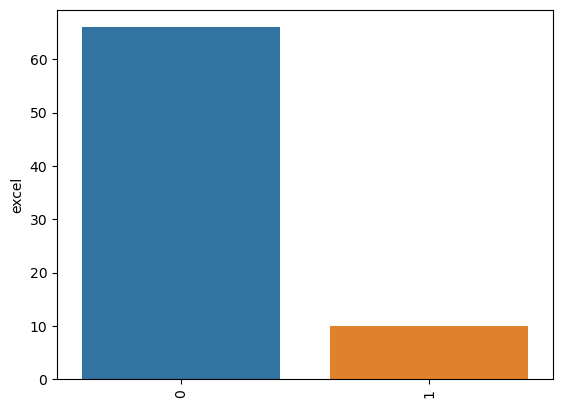

graph for job_simp: total = 5


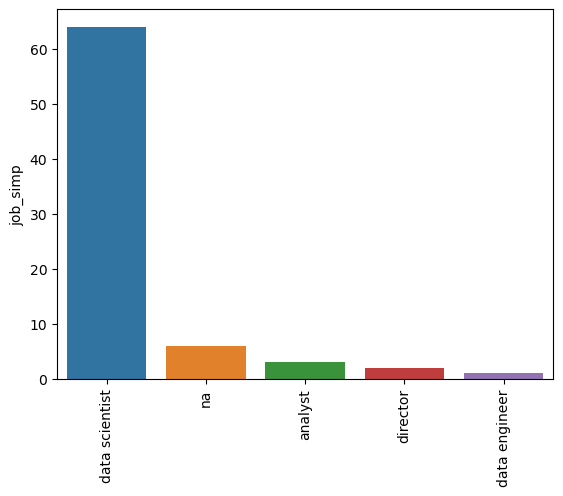

graph for seniority: total = 3


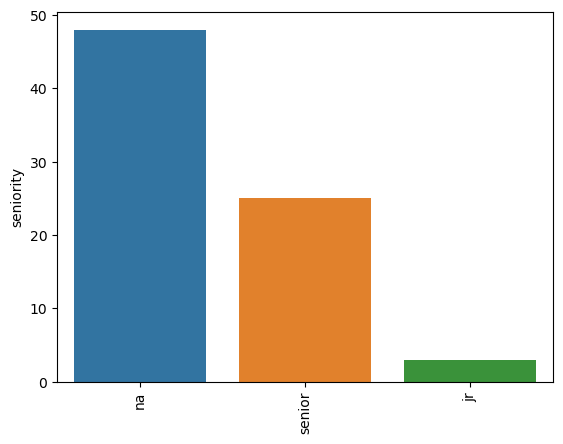

In [53]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


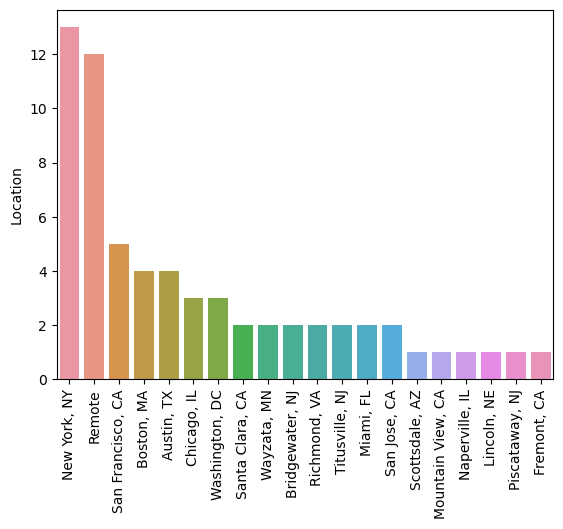

graph for company_txt: total = 20


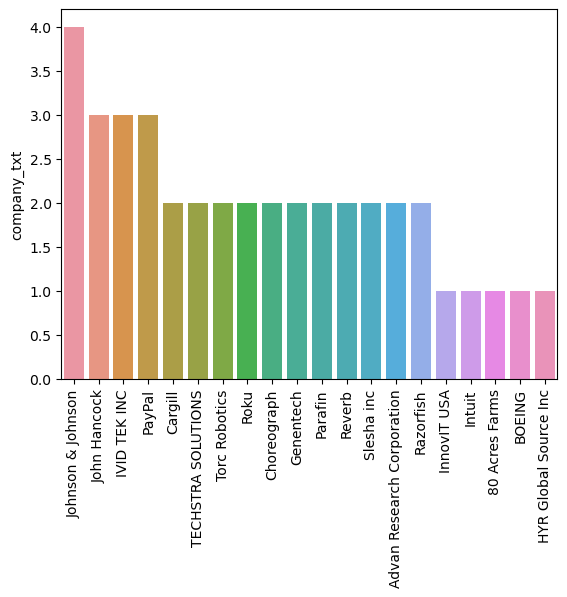

In [54]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [55]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')


,avg_salary
job_simp,
analyst,84.538333
data engineer,111.000000
data scientist,118.545703
director,152.750000
na,100.250000


In [56]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')


avg_salary
job_simp       seniority            
analyst        na          72.000000
               senior      90.807500
data engineer  na         111.000000
data scientist jr          99.543333
               na         107.073553
               senior     139.978261
director       na         152.750000
na             na         100.250000

In [57]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
VA        director        165.500000
          data scientist  121.000000
TX        data scientist  105.750000
OH        data scientist  108.500000
NY        data scientist  141.318182
          analyst          71.807500
NJ        data scientist  122.400000
NE        data scientist   98.000000
NC        na               95.500000
MN        data scientist  134.500000
MA        data scientist  120.000000
          data engineer   111.000000
IL        data scientist  111.250000
FL        director        140.000000
          data scientist   75.000000
DC        na              104.250000
          data scientist   82.500000
CA        data scientist  129.673214
          na              132.500000
AZ        data scientist  103.166667

In [59]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [60]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
VA        director                 1
          data scientist           2
TX        data scientist           4
OH        data scientist           1
NY        data scientist          11
          analyst                  2
NJ        data scientist           5
NE        data scientist           1
NC        na                       1
MN        data scientist           2
MA        data scientist           5
          data engineer            1
IL        data scientist           4
FL        director                 1
          data scientist           1
DC        na                       2
          data scientist           1
CA        data scientist          14
          na                       1
AZ        data scientist           3

In [61]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NY,141.318182
MN,134.500000
CA,129.673214
NJ,122.400000
VA,121.000000
MA,120.000000
IL,111.250000
OH,108.500000
TX,105.750000


In [65]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]
for column in df_pivots.columns:
    if column != 'avg_salary':  # Skip 'avg_salary' itself
        pivot_table = pd.pivot_table(df_pivots, index=column, values='avg_salary').sort_values('avg_salary', ascending=False)
        print(f"Pivot table for column '{column}':")
        print(pivot_table)
        print("\n")


Pivot table for column 'Rating':
        avg_salary
Rating            
3.2     205.000000
3.0     165.500000
4.6     162.500000
4.1     160.500000
3.4     138.000000
4.5     137.750000
4.2     134.125000
4.0     125.785714
4.7     121.500000
3.9     120.639375
4.4     120.000000
3.7     114.043333
2.9     108.250000
3.8     106.970714
3.1     106.250000
4.9     103.500000
3.6     103.250000
3.5     100.000000
1.0      95.821429
5.0      82.500000
3.3      67.500000
4.3      34.000000


Pivot table for column 'Industry':
                                         avg_salary
Industry                                           
Publishing                               170.250000
Financial Transaction Processing         154.833333
Investment & Asset Management            154.500000
Internet & Web Services                  146.105000
Biotech & Pharmaceuticals                137.214286
Computer Hardware Development            132.500000
Enterprise Software & Network Solutions  130.166667
Insura

In [66]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),1.0,NaN
$1 to $5 million (USD),3.0,NaN
$10+ billion (USD),16.0,NaN
$100 to $500 million (USD),2.0,NaN
$25 to $100 million (USD),8.0,1.0
$5 to $10 billion (USD),2.0,NaN
$5 to $25 million (USD),2.0,NaN
$500 million to $1 billion (USD),4.0,NaN
-1,3.0,1.0


In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarthak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

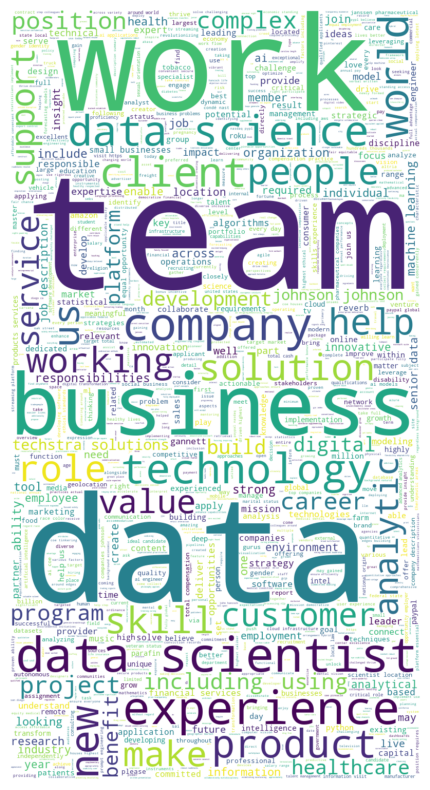

In [69]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
df.to_csv('eda_data.csv')